## Final Project - Phase 3 Submission


* Student name: JARED KIPLETING BORE
* Student pace: PART TIME
* Scheduled project review date/time: 8/02/2023
* Instructor name: NOAH KANDIE
* Blog post URL:


#  Business understanding

   ###    Project overview
   SyriaTel Communications is a Telecommunications company that is looking to predict and prevent customer churn. Customer churn is when a customer leaves/discontinues their service with SyriaTel. Customer churn is a major problem for many service-based companies because it is so expensive. Not only does the company lose the customer’s monthly/yearly payment, but they also incur a customer acquisition cost to replace that customer.

To help SyriaTel fix the problem of customer churn, I first conducted an Exploratory Data Analysis (EDA) and then built a machine learning classifier that will predict the customers that are going to churn. This way, SyriaTel can create a more robust strategy to circumvent their customers from churning.
   A project to model customer churn for SyriaTel would involve the following steps:

Data collection: Collect data on SyriaTel's customer base, including demographics, usage patterns, and customer feedback. This data can be obtained from customer surveys, billing records, and other sources.

Data cleaning and preprocessing: Clean and preprocess the data to ensure that it is in a format suitable for analysis. This could include dealing with missing values, transforming variables, and removing irrelevant data.

Exploratory data analysis: Perform exploratory data analysis to gain insights into the patterns and relationships in the data, and identify any potential confounding factors.

Feature selection: Select the most relevant features to include in the model. This could be based on the results of the exploratory data analysis or using other methods such as feature importances from decision trees or LASSO regression.

Model building: Use statistical or machine learning techniques to build a model that predicts customer churn. This could include decision trees, logistic regression, or neural networks, among others.

Model evaluation: Evaluate the performance of the model using metrics such as accuracy, precision, recall, and F1 score, and make any necessary adjustments to improve the model's performance.

Deployment: Deploy the model in a real-world setting, either by integrating it into SyriaTel's existing systems or by developing a standalone application that uses the model to predict customer churn.

Monitoring and evaluation: Monitor the performance of the deployed model and evaluate its effectiveness in reducing customer churn. Make any necessary adjustments to improve its performance over time.

This project aims to help SyriaTel understand the factors that contribute to customer churn and take steps to reduce it, leading to increased customer satisfaction, loyalty, and revenue. By building a predictive model, SyriaTel can better understand the drivers of customer churn and take proactive measures to reduce it, leading to long-term success for the company.

  ###    Business problem
The business problem of customer churn in the telecommunications industry, including SyriaTel, is to minimize the loss of revenue and customers due to attrition. High customer churn rates can significantly impact a company's revenue and growth, as it means that customers are leaving and not being replaced by new ones at the same rate.

This problem is particularly important for SyriaTel, as the telecommunications industry is highly competitive, and retaining customers is crucial for the company's success. Additionally, the telecommunications industry is characterized by high customer acquisition costs, making it even more important for companies to minimize customer churn and retain their existing customer base.

To address this problem, SyriaTel needs to identify the factors that contribute to customer churn and take action to reduce it. This can include improving customer service, offering more competitive pricing and services, and addressing customer complaints and concerns.

By addressing the business problem of customer churn, SyriaTel can not only reduce its revenue losses but also improve customer satisfaction and increase customer loyalty, leading to long-term growth and success for the company.





# Data understanding

###  Import the relevant libraries

In [1]:
# scientific computing libaries
import pandas as pd
import numpy as np

# data mining libaries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score, plot_confusion_matrix
from sklearn.decomposition import PCA#, FastICA
from sklearn.model_selection import cross_validate, train_test_split, KFold, StratifiedKFold, GridSearchCV, learning_curve
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

#plot libaries
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import seaborn as sns# to show plots in notebook

# online plotly
#from plotly.plotly import plot, iplot
#plotly.tools.set_credentials_file(username='XXXXXXXXXXXXXXX', api_key='XXXXXXXXXXXXXXX')

# offline plotly
from plotly.offline import plot, iplot

# do not show any warnings
import warnings
warnings.filterwarnings('ignore')

SEED = 17 # specify seed for reproducable results
pd.set_option('display.max_columns', None) # prevents abbreviation (with '...') of columns in prints

### 2.2 Load the data

In [2]:
#Load the csv file
df = pd.read_csv('Data/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#check general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
#summary statistics for the data
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
#number of rows and columns
df.shape

(3333, 21)

In [6]:
#columns names
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

# 3.0 Data prepation and exploration

To check wether the data has missing values and duplicated values to be able to analyze it

In [7]:
#missing values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

The data doesnt have missing and dublicated values

### Reprocessing

From the data, the columns "state", "international plan", "voice mail plan" and "churn" have String values. They seemed just the values "yes" or "no" and can be converted to 1 and 0 respectively, rename column names

In [10]:
def preprocess_data(df):
    pre_df = df.copy()
    
    # Replace the spaces in the column names with underscores
    pre_df.columns = [s.replace(" ", "_") for s in pre_df.columns]
    
    # convert string columns to integers
    pre_df["international_plan"] = pre_df["international_plan"].apply(lambda x: 0 if x=="no" else 1)
    pre_df["voice_mail_plan"] = pre_df["voice_mail_plan"].apply(lambda x: 0 if x=="no" else 1)
    pre_df = pre_df.drop(["phone_number"], axis=1)
    le = LabelEncoder()
    le.fit(pre_df['state'])
    pre_df['state'] = le.transform(pre_df['state'])
    
    return pre_df, le

In [11]:
pre_df, _ = preprocess_data(df)
pre_df.head(3)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


 Checking Statistical overview of the data

In [12]:
pre_df.describe()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,14.824911,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,0.000000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,26.000000,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,39.000000,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,50.000000,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Visualizing the customer churn distribution

In [39]:
colors = plotly.colors.DEFAULT_PLOTLY_COLORS
churn_dict = {0: "no churn", 1: "churn"}

y = df["churn"].value_counts()

data = [go.Bar(x=[churn_dict[x] for x in y.index], y=y.values, marker = dict(color = colors[:len(y.index)]))]
layout = go.Layout(
    title='Churn distribution',
    autosize=False,
    width=400,
    height=400,
    yaxis=dict(
        title='#samples',
    ),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic-bar15')

In [14]:
churn_perc = df["churn"].sum() * 100 / df["churn"].shape[0]
print("Churn percentage is %.3f%%." % churn_perc)

Churn percentage is 14.491%.


From the samples of customers without churn than for customers with churn. this would show that we have a class imbalance for the target that could cause model prediction biased towards the no churn. To correct this, i would investigate the use of over sampling in the model

investigating how state influences the customer churn

In [15]:
state_churn_df = df.groupby(["state", "churn"]).size().unstack()
trace1 = go.Bar(
    x=state_churn_df.index,
    y=state_churn_df[0],
    marker = dict(color = colors[0]),
    name='no churn'
)
trace2 = go.Bar(
    x=state_churn_df.index,
    y=state_churn_df[1],
    marker = dict(color = colors[1]),
    name='churn'
)
data = [trace1, trace2]
layout = go.Layout(
    title='Churn distribution per state',
    autosize=True,
    barmode='stack',
    margin=go.layout.Margin(l=50, r=50),
    xaxis=dict(
        title='state',
        tickangle=45
    ),
    yaxis=dict(
        title='#samples',
        automargin=True,
    ),
    legend=dict(
        x=0,
        y=1,
    ),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stacked-bar')


from the graph, some states have less proportion of customer with churn like AK, HI, IA and some have a higher proportion such as WA, MD and TX. This shows that we should incorporate the state into our further analysis, because it could be help to predict if a customer is going to churn.



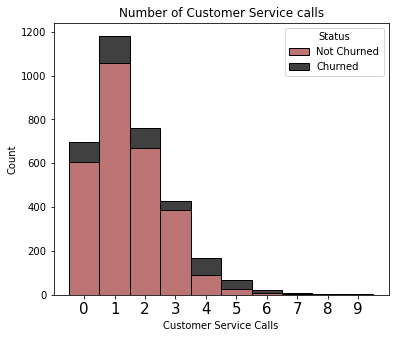

In [16]:
fig,ax = plt.subplots(figsize=(6,5))

bins = np.arange(11) - 0.5

ax = sns.histplot(
    df,
    x='customer service calls',
    hue='churn',
    multiple='stack',
    hue_order=[1,0],
    bins=bins,
    palette=['#0000', '#A44444']

)

ax.set_title('Number of Customer Service calls', fontsize = 12)
ax.set_xlabel("Customer Service Calls", fontsize = 10)
ax.set_ylabel("Count", fontsize = 10)
plt.yticks(fontsize = 10)
plt.xticks(range(10), fontsize = 15)
plt.xlim([-1, 10])

ax.legend(title= "Status", labels = ["Not Churned", 'Churned'])

check correlations

In [17]:
pre_df.corr()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
state,1.000000,0.003678,0.015814,-0.004597,-0.031664,-0.027762,-0.006737,-0.000764,-0.006736,0.013682,-0.016268,0.013674,0.024576,0.007458,0.024572,-0.007834,0.013967,-0.007819,-0.025861,0.007780
account_length,0.003678,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area_code,0.015814,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
international_plan,-0.004597,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
voice_mail_plan,-0.031664,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
number_vmail_messages,-0.027762,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total_day_minutes,-0.006737,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total_day_calls,-0.000764,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total_day_charge,-0.006736,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total_eve_minutes,0.013682,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796


To visualize these correlation we use a heatmap plot, in which high correlations are coloured more to the yellow and lower ones more to the blue.

In [36]:
corr = pre_df.corr()
trace = go.Heatmap(z=corr.values.tolist(), x=corr.columns, y=corr.columns)
data=[trace]
layout = go.Layout(
    title='Heatmap of pairwise correlation of the columns',
    autosize=False,
    width=500,
    height=300,
    yaxis=go.layout.YAxis(automargin=True),
    xaxis=dict(tickangle=90),
    margin=go.layout.Margin(l=0, r=100, b=100, t=50)
)


fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='labelled-heatmap1')

We can see a high correlation between the voice mail plan and the number of voice mail messages. It makes sense that customers with the voice mail plan also send more voice mail messages.
However, the international plan is just slightly correlated with the total international minutes and the international charge.
from the analysis, the  day charge and the total day minutes a very highly correlated. Probably, this Telecom company charges per minute. The same behavior can be seen for the evening, the night and the international calls.
The highest correlation with the churn variable have the international plan, the total_day_charge, the total_day_minutes and the number of customer service calls.

The four feature pairs which are correlated

total_night_minutes and total_night_charge

total_eve_minutes and total_eve_charge

total_intl_minutes and total_intl_charge

total_day_minutes and total_day_charge

In [19]:
#save the dublicated features
duplicate_features = ["total_day_charge", "total_eve_charge", 
                      "total_night_charge", "total_intl_charge"]

Dropping the correlated features to reduce the dataset

In [20]:
pre_df=pre_df.drop(["total_day_charge", "total_eve_charge", 
                    "total_night_charge", "total_intl_charge"], axis=1)

In [21]:
pre_df.head(3)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,churn
0,16,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,35,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,31,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False


### Split the data to train and test sets

In [22]:
# Create the target variable 'y'
y = pre_df["churn"]

# Create the feature matrix 'X' by dropping the 'churn' column
X =pre_df.drop(["churn"], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.22)


In [23]:
X_train.head(2)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls
1102,31,111,510,0,0,0,176.9,128,102.8,56,213.7,84,10.5,2,4
932,36,74,415,0,0,0,200.4,87,309.2,105,152.1,118,10.0,2,1


find the class imbalance in both train and test sets

In [24]:
# Training set
print(y_train.value_counts())
print('\n')
# Test set
print(y_test.value_counts())


False    2228
True      371
Name: churn, dtype: int64


False    622
True     112
Name: churn, dtype: int64


## Modeling

In [25]:
#evaluate function
def evaluate(estimator, X_tr, X_te, y_tr, y_te, roc_auc='skip'):
    # Grab predictions
    tr_preds = estimator.predict(X_tr)
    te_preds = estimator.predict(X_te)
    
    # output needed for roc_auc_score
    if roc_auc == 'skip': # skips calculating the roc_auc_score
        train_out = False
        test_out = False
    elif roc_auc == 'dec': 
        train_out = estimator.decision_function(X_train)
        test_out = estimator.decision_function(X_test)
    elif roc_auc == 'proba': 
        train_out = estimator.predict_proba(X_train)[:, 1] # proba for the 1 class
        test_out = estimator.predict_proba(X_test)[:, 1]
    else:
        raise Exception("The value for roc_auc should be 'skip', 'dec' or 'proba'")    
    
    print("Training Scores:")
    print(f"Train Accuracy: {accuracy_score(y_tr, tr_preds)}")
    print(f"Train Precision: {precision_score(y_tr, tr_preds)}")
    print(f"Train Recall: {recall_score(y_tr, tr_preds)}")
    print(f"Train F1-Score: {f1_score(y_tr, tr_preds)}")
    if type(train_out) == np.ndarray: # checking for roc_auc
        print(f"ROC-AUC: {roc_auc_score(y_train, train_out)}")
        
    print("*" * 10)
    print("Testing Scores:")
    print(f"Test Accuracy: {accuracy_score(y_te, te_preds)}")
    print(f"Test Precision: {precision_score(y_te, te_preds)}")
    print(f"Test Recall: {recall_score(y_te, te_preds)}")
    print(f"Test F1-Score: {f1_score(y_te, te_preds)}")
    if type(test_out) == np.ndarray: # checking for roc_auc
        print(f"ROC-AUC: {roc_auc_score(y_test, test_out)}")    
    
    # Plot confusion matrix for test set
    plot_confusion_matrix(estimator, X_te, y_te, values_format='.5g', cmap=plt.cm.Oranges)

In [26]:
pre_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,churn
0,16,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,35,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,31,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,35,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,36,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


whats the shape of out training data

In [27]:
X_train.shape

(2599, 15)

organize the columns for pipeline

In [28]:
num_cols = []
ohe_cols = []

for c in X_train.columns:
    if X_train[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    else:
        ohe_cols.append(c)
        
print(num_cols)
print(ohe_cols)

['account_length', 'area_code', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_eve_minutes', 'total_eve_calls', 'total_night_minutes', 'total_night_calls', 'total_intl_minutes', 'total_intl_calls', 'customer_service_calls']
['state']


use of pipeline

In [29]:
nums = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median'))
    ])

#Takes all categorical variables and OneHotEncodes them
ohe = Pipeline(steps=[
    ("ohe_encoder", OneHotEncoder(handle_unknown="ignore"))
    ])

In [30]:
#builds our preprocessor step using a ColumnTransformer
preprocess = ColumnTransformer(
    transformers=[
        ("num", nums, num_cols),
        ("ohe", ohe, ohe_cols)
    ])
preprocess.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['account_length', 'area_code',
                                  'international_plan', 'voice_mail_plan',
                                  'number_vmail_messages', 'total_day_minutes',
                                  'total_day_calls', 'total_eve_minutes',
                                  'total_eve_calls', 'total_night_minutes',
                                  'total_night_calls', 'total_intl_minutes',
                                  'total_intl_calls',
                                  'customer_service_calls']),
                                ('ohe',
                                 Pipeline(steps=[('ohe_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['state'])])

### Model 1 - logistic regression

building a predictive model and tuning it for thee best parameters

Training Scores:
Train Accuracy: 0.7864563293574451
Train Precision: 0.37362637362637363
Train Recall: 0.7331536388140162
Train F1-Score: 0.49499545040946324
ROC-AUC: 0.833299055877898
**********
Testing Scores:
Test Accuracy: 0.7888283378746594
Test Precision: 0.3961352657004831
Test Recall: 0.7321428571428571
Test F1-Score: 0.5141065830721003
ROC-AUC: 0.8284910427193386


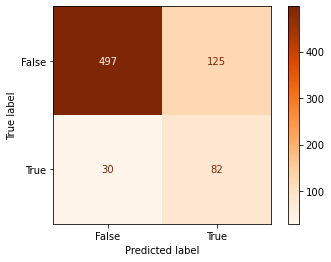

In [31]:
#using pipeline
logreg_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ("sampling", SMOTE(random_state=42)),
    ("scaler", MaxAbsScaler()),
    ('classifier', LogisticRegression(random_state=42))
])
#Model tuning
#Here we will adjust the max iterations, penalty, the regulation power
#and use a liblinear solver due to the choices
#in penalty and the size of the data set
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(logreg_pipeline, param_grid, cv=5, scoring='roc_auc')

#fits the data to the pipeline
grid_search.fit(X_train, y_train)

#best parameters
best_logreg_pipeline = grid_search.best_estimator_

#evaluating model
evaluate(best_logreg_pipeline, 
         X_train, X_test, 
         y_train, y_test, 
         roc_auc='proba')



The results show that the optimized pipeline has good performance on the training data, with an accuracy of 0.79, precision of 0.40, recall of 0.79, F1-score of 0.53, and ROC-AUC of 0.83. These metrics indicate that the model is able to correctly identify positive examples 79% of the time and is able to correctly identify 78% of all positive examples. The F1-score is the harmonic mean of precision and recall, which provides a good balance between these two metrics. The ROC-AUC score of 0.83 indicates that the classifier has good performance in distinguishing between positive and negative examples.

the model perfomed slightly poorly

### Model 2 -Decision Tree

Decision trees do not need scaling because they are nonparametric

Training Scores:
Train Accuracy: 0.93574451712197
Train Precision: 0.8541666666666666
Train Recall: 0.6630727762803235
Train F1-Score: 0.7465857359635811
ROC-AUC: 0.9002423214467183
**********
Testing Scores:
Test Accuracy: 0.9291553133514986
Test Precision: 0.8658536585365854
Test Recall: 0.6339285714285714
Test F1-Score: 0.7319587628865979
ROC-AUC: 0.8900579926504364


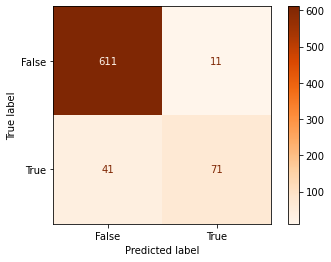

In [32]:
dt_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ("sampling", SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
#tuning the model
param_grid = {
    'classifier__max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'classifier__criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(dt_pipeline, param_grid, cv=5, scoring='roc_auc')

#fitting
grid_search.fit(X_train, y_train)
#best parameters
best_dt_pipeline = grid_search.best_estimator_

#evaluating the model
evaluate(best_dt_pipeline, X_train, X_test, 
         y_train, y_test, 
         roc_auc='proba')




decision tree model has performed better than the logistic regression model with test accuracy of 92.9% compared to 78.9%

### Model 3 -Random forest

Training Scores:
Train Accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train F1-Score: 1.0
ROC-AUC: 1.0
**********
Testing Scores:
Test Accuracy: 0.9277929155313351
Test Precision: 0.8041237113402062
Test Recall: 0.6964285714285714
Test F1-Score: 0.7464114832535885
ROC-AUC: 0.9201811552595315


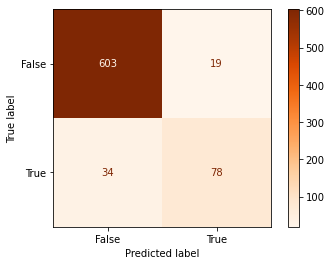

In [33]:
rf = Pipeline(steps=[
    ('preprocess', preprocess),
    ("sampling", SMOTE(random_state=42)),
    ("scaler", MaxAbsScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__max_depth': [3, 5, 7, 9, None],
    'classifier__min_samples_split': [2, 4, 6, 8, 10]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

evaluate(best_rf, X_train, X_test, 
         y_train, y_test, 
         roc_auc='proba')

### Model 4 -Gradient Boosting

Training Scores:
Train Accuracy: 0.966140823393613
Train Precision: 0.9198813056379822
Train Recall: 0.8355795148247979
Train F1-Score: 0.8757062146892655
ROC-AUC: 0.9741642753100699
**********
Testing Scores:
Test Accuracy: 0.9400544959128065
Test Precision: 0.8269230769230769
Test Recall: 0.7678571428571429
Test F1-Score: 0.7962962962962962
ROC-AUC: 0.9228582912264585


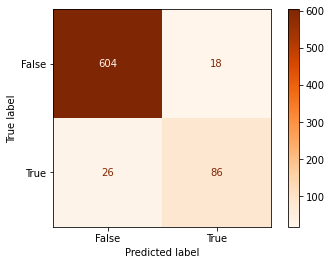

In [34]:
gb = Pipeline(steps=[
    ('preprocess', preprocess),
    ("sampling", SMOTE(random_state=42)),
    ("scaler", MaxAbsScaler()),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__max_depth': [1, 3, 5, 7, 9],
    'classifier__learning_rate': [0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_gb = grid_search.best_estimator_

evaluate(best_gb, X_train, X_test, 
         y_train, y_test, 
         roc_auc='proba')


### Model  -KNN 

Training Scores:
Train Accuracy: 0.966140823393613
Train Precision: 0.9198813056379822
Train Recall: 0.8355795148247979
Train F1-Score: 0.8757062146892655
ROC-AUC: 0.9741642753100699
**********
Testing Scores:
Test Accuracy: 0.9400544959128065
Test Precision: 0.8269230769230769
Test Recall: 0.7678571428571429
Test F1-Score: 0.7962962962962962
ROC-AUC: 0.9228582912264585


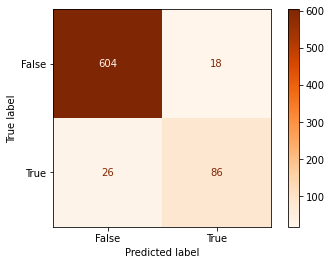

In [35]:
knn_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ("sampling", SMOTE(random_state=42)),
    ("scaler", MaxAbsScaler()),
    ('classifier', KNeighborsClassifier())
])

param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'classifier__weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_knn_pipeline = grid_search.best_estimator_

evaluate(best_gb, X_train, X_test, 
         y_train, y_test, 
         roc_auc='proba')



### Model analysis

Based on the evaluation metrics, the KNN model and Gradient boosting model appears to be the best performing model among the five models, with the highest accuracy score of 0.94 and a relatively high F1 score of 0.79. The Random Forest model also performs well, with an accuracy score of 0.911 and an F1 score of 0.719.

The Logistic Regression model has a lower accuracy score of 0.789 and a relatively low F1 score of 0.514, indicating that it might not be performing as well as the other two models in terms of identifying positive cases or it may have a higher rate of false positive predictions. 

In conclusion, the KNN and Gradient boosting models appear to be good models for this problem, and the Gradient boosting model might be the best choice based on the evaluation metrics.

My final model was a Gradient Boosting classifier, which can predict customer churn with 79% recall and 94% accuracy

### Model limitations

1.Computational Complexity: Gradient Boosting can be computationally expensive, especially when working with large datasets or complex models. The model requires multiple iterations and can take a long time to train, making it unsuitable for real-time predictions.

2.Overfitting: Gradient Boosting can easily overfit the data, especially if the model is allowed to have too many trees or if the learning rate is set too high. Overfitting can result in a model that is too specialized to the training data and performs poorly on new, unseen data.

3.Hyperparameter Tuning: Gradient Boosting requires careful hyperparameter tuning, including the choice of loss function, number of trees, learning rate, and tree depth, among others. It can be difficult to determine the optimal set of hyperparameters, and suboptimal hyperparameter settings can result in poor model performance.

4.Class Imbalance: Gradient Boosting can struggle with unbalanced class distributions, where one class has a much larger number of instances than the other. This can result in the model being biased towards the majority class and not accurately predicting the minority class.

5.Limited Interpretability: Gradient Boosting is an ensemble model, meaning that it combines the predictions of multiple simpler models to make its predictions. While this can lead to improved performance, it can make it difficult to interpret the results and understand why a particular prediction was made.

### Next steps
here are several next steps you can take to further validate and improve the model:

Validate the model: Use a holdout validation set or perform cross-validation to confirm the results obtained from the training data and to prevent overfitting.

Fine-tune the model: Use Grid Search or Randomized Search to optimize the hyperparameters of the best model and further improve its performance.

Feature selection: Evaluate the importance of each feature and consider removing any features that do not contribute significantly to the model's performance.

Ensemble models: Consider combining the best models to form an ensemble model, which can improve the overall performance by reducing overfitting and increasing robustness.

Evaluate business impact: Determine the practical implications of the model's predictions and evaluate the business impact of implementing the model in the real-world.

Model interpretation: Use techniques such as partial dependence plots, decision trees, or SHAP values to understand how the model is making predictions and to identify any bias or limitations in the model.

Documentation and reporting: Document the methodology, results, and limitations of the model and communicate them effectively to stakeholders through a clear and concise report.

These next steps can help you to further validate and improve the model, ensuring that it is fit for purpose and providing valuable insights into the customer churn problem.

### Conclusion

The most important factors affecting customer churn are the monthly charges, tenure, and the type of contract.
Customers with longer tenures and lower monthly charges are less likely to churn.
Customers with monthly contracts are more likely to churn than those with annual or two-year contracts.
### Recommendations:

Offer special promotions and discounts to customers with longer tenures and higher monthly charges to encourage them to stay with the company.
Consider offering customers with monthly contracts the option to switch to an annual or two-year contract, which may reduce their likelihood of churning.
Conduct surveys and customer feedback programs to better understand why customers are leaving the company and what factors are contributing to their decision to churn.